In [4]:
#Cell_1.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error


plt.rcParams['font.family'] = 'Yu Mincho' # for Japanese in graph (Win)

In [5]:
#Cell_2.
csv_in="yields.csv"
df=pd.read_csv(csv_in,skiprows=0,header=0,delimiter=',',encoding="shift-jis")
print(df.shape) #確認
print(df.head()) #確認
print(type(df['time'][0]))\
#df['time']=pd.to_datetime(df['time'].astype(int),unit='ms')
#df['time']=pd.to_datetime(df['time'])
#print(type(df['time'][0]))

(12787, 216)
           time  AU01  AU02   AU03  AU05  AU07  AU10  AU15  AU20  AU30  ...  \
0  957533400000  6.28  6.34  6.460  6.52   0.0  6.56  6.56   0.0   0.0  ...   
1  957792600000  6.26  6.34  6.415  6.52   0.0  6.56  6.49   0.0   0.0  ...   
2  957879000000  6.34  6.38  6.500  6.54   0.0  6.55  6.55   0.0   0.0  ...   
3  957965400000  6.24  6.34  6.390  6.51   0.0  6.54  6.50   0.0   0.0  ...   
4  958051800000  6.22  6.26  6.374  6.42   0.0  6.41  6.42   0.0   0.0  ...   

   US03M  US06M  US01   US02   US03   US05  US07   US10  US20   US30  
0  5.899  5.910   0.0  6.784  4.557  6.692   0.0  6.511   0.0  6.157  
1  5.899  5.910   0.0  6.784  4.557  6.692   0.0  6.568   0.0  6.157  
2  5.984  6.031   0.0  6.872  4.557  6.827   0.0  6.524   0.0  6.248  
3  6.115  6.140   0.0  6.851  4.557  6.788   0.0  6.457   0.0  6.216  
4  6.083  6.104   0.0  6.804  4.557  6.668   0.0  6.420   0.0  6.154  

[5 rows x 216 columns]
<class 'numpy.int64'>


In [6]:
#Cell_3.
from datetime import datetime
for i in range(len(df)):
    df.loc[i,'time']= datetime.fromtimestamp((df.loc[i,'time']/1000))

In [7]:
#Cell_4.
display(df.head())
display(df.tail())

,time,AU01,AU02,AU03,AU05,AU07,AU10,AU15,AU20,AU30,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
0,2000-05-05 22:30:00,6.28,6.34,6.460,6.52,0.0,6.56,6.56,0.0,0.0,...,5.899,5.910,0.0,6.784,4.557,6.692,0.0,6.511,0.0,6.157
1,2000-05-08 22:30:00,6.26,6.34,6.415,6.52,0.0,6.56,6.49,0.0,0.0,...,5.899,5.910,0.0,6.784,4.557,6.692,0.0,6.568,0.0,6.157
2,2000-05-09 22:30:00,6.34,6.38,6.500,6.54,0.0,6.55,6.55,0.0,0.0,...,5.984,6.031,0.0,6.872,4.557,6.827,0.0,6.524,0.0,6.248
3,2000-05-10 22:30:00,6.24,6.34,6.390,6.51,0.0,6.54,6.50,0.0,0.0,...,6.115,6.140,0.0,6.851,4.557,6.788,0.0,6.457,0.0,6.216
4,2000-05-11 22:30:00,6.22,6.26,6.374,6.42,0.0,6.41,6.42,0.0,0.0,...,6.083,6.104,0.0,6.804,4.557,6.668,0.0,6.420,0.0,6.154


,time,AU01,AU02,AU03,AU05,AU07,AU10,AU15,AU20,AU30,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
12782,1973-04-03 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12783,1973-04-04 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12784,1973-04-05 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12785,1973-04-06 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12786,1973-04-09 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#Cell_5.
df_sorted = df.sort_values(by='time')
display(df_sorted.tail(20))

,time,AU01,AU02,AU03,AU05,AU07,AU10,AU15,AU20,AU30,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
5068,2020-06-26 22:30:00,0.2573,0.2644,0.2594,0.3934,0.5907,0.8779,1.1987,1.4933,1.7047,...,0.1344,0.1674,0.1649,0.1761,0.1945,0.3050,0.4849,0.6495,1.1488,1.3744
5069,2020-06-29 22:30:00,0.2400,0.2581,0.2629,0.3917,0.6019,0.8942,1.2294,1.5297,1.7333,...,0.1242,0.1547,0.1624,0.1591,0.1672,0.2692,0.4593,0.6266,1.1422,1.3737
5070,2020-06-30 22:30:00,0.2555,0.2581,0.2652,0.3980,0.5910,0.8794,1.2070,1.5150,1.7250,...,0.1420,0.1674,0.1522,0.1677,0.1796,0.2773,0.4744,0.6577,1.1758,1.4110
5071,2020-07-01 22:30:00,0.2601,0.2480,0.2817,0.4063,0.6305,0.9461,1.2634,1.5892,1.7975,...,0.1420,0.1624,0.1624,0.1764,0.1905,0.3089,0.5035,0.6783,1.1874,1.4222
5072,2020-07-02 22:30:00,0.2586,0.2547,0.2700,0.4054,0.6163,0.9354,1.2693,1.5813,1.7923,...,0.1420,0.1573,0.1599,0.1659,0.1826,0.2925,0.4930,0.6750,1.1919,1.4302
5073,2020-07-06 22:30:00,0.2590,0.2525,0.2718,0.4157,0.6142,0.9363,1.2715,1.6007,1.8396,...,0.1420,0.1674,0.1522,0.1681,0.1881,0.2981,0.4965,0.6816,1.2030,1.4402
5074,2020-07-07 22:30:00,0.2570,0.2559,0.2645,0.4013,0.5883,0.8925,1.2263,1.5573,1.8273,...,0.1471,0.1624,0.1624,0.1703,0.1909,0.2826,0.4673,0.6414,1.1439,1.3757
5075,2020-07-08 22:30:00,0.2526,0.2554,0.2710,0.3925,0.5737,0.8805,1.1973,1.5140,1.7778,...,0.1471,0.1573,0.1522,0.1726,0.1903,0.2931,0.4953,0.6693,1.1701,1.4032
5076,2020-07-09 22:30:00,0.2544,0.2552,0.2675,0.4072,0.5982,0.9068,1.2303,1.5345,1.8116,...,0.1471,0.1522,0.1497,0.1618,0.1825,0.2792,0.4591,0.6217,1.0925,1.3150
5077,2020-07-10 22:30:00,0.2500,0.2520,0.2705,0.4073,0.5763,0.8655,1.1903,1.5029,1.7707,...,0.1268,0.1471,0.1522,0.1729,0.1956,0.2979,0.4824,0.6463,1.1144,1.3359


In [9]:
#Cell_6.
df_sorted['time']=pd.to_datetime(df_sorted['time'])
df_sorted['time']=df_sorted['time'].dt.date

df_sorted=df_sorted.reset_index(drop=True)
df_sorted['time']=pd.to_datetime(df_sorted['time'])
display(df_sorted.head())

,time,AU01,AU02,AU03,AU05,AU07,AU10,AU15,AU20,AU30,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
0,1970-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1970-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1970-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1970-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1970-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#Cell_7.
csv_in2="8316_2018.csv"
df2=pd.read_csv(csv_in2,skiprows=1,header=0,delimiter=',',encoding="shift-jis")
print(df2.shape) #確認
print(df2.head()) #確認
print(type(df2['日付'][0]))
df2['日付']=pd.to_datetime(df2['日付'])
print(type(df2['日付'][0]))

(105, 7)
           日付    始値    高値    安値    終値       出来高  終値調整値
0  2018-01-04  4949  5015  4946  5013   9066700   5013
1  2018-01-05  5071  5134  5067  5095  10985300   5095
2  2018-01-09  5190  5203  5078  5090   7822700   5090
3  2018-01-10  5182  5215  5168  5177   9731100   5177
4  2018-01-11  5230  5242  5178  5228   8621500   5228
<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [11]:
#Cell_8.
df2.columns=['time','start','high','low','close','volume','adj-close']
display(df2.head())

,time,start,high,low,close,volume,adj-close
0,2018-01-04,4949,5015,4946,5013,9066700,5013
1,2018-01-05,5071,5134,5067,5095,10985300,5095
2,2018-01-09,5190,5203,5078,5090,7822700,5090
3,2018-01-10,5182,5215,5168,5177,9731100,5177
4,2018-01-11,5230,5242,5178,5228,8621500,5228


In [12]:
#Cell_9.
df_merged=pd.merge(df2,df_sorted,on='time',how='left')
display(df_merged.head())

,time,start,high,low,close,volume,adj-close,AU01,AU02,AU03,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
0,2018-01-04,4949,5015,4946,5013,9066700,5013,1.6914,1.8644,2.0798,...,1.4091,1.5956,1.8125,1.9515,2.0398,2.2953,2.4114,2.4817,0.0,2.7882
1,2018-01-05,5071,5134,5067,5095,10985300,5095,1.6914,1.8644,2.0798,...,1.4038,1.5888,1.8005,1.9599,2.0706,2.2852,2.4040,2.4772,0.0,2.8078
2,2018-01-09,5190,5203,5078,5090,7822700,5090,1.7094,1.9067,2.1311,...,1.4488,1.6007,1.7861,1.9804,2.0876,2.3375,2.4707,2.5563,0.0,2.8992
3,2018-01-10,5182,5215,5168,5177,9731100,5177,1.7004,2.0300,2.1258,...,1.4168,1.5865,1.7639,1.9846,2.0946,2.3342,2.4739,2.5595,0.0,2.9016
4,2018-01-11,5230,5242,5178,5228,8621500,5228,1.8282,2.0522,2.1549,...,1.4295,1.5891,1.7691,1.9929,2.1027,2.3393,2.4758,2.5477,0.0,2.8681


In [13]:
#Cell_10.
df_merged=df_merged[['time','close','JP01','JP02']]

print(df_merged.shape)
print(df_merged.info())
display(df_merged.head())

(105, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    105 non-null    datetime64[ns]
 1   close   105 non-null    int64         
 2   JP01    101 non-null    float64       
 3   JP02    101 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 4.1 KB
None


,time,close,JP01,JP02
0,2018-01-04,5013,-0.1415,-0.1363
1,2018-01-05,5095,-0.1415,-0.1363
2,2018-01-09,5090,-0.1402,-0.1350
3,2018-01-10,5177,-0.1318,-0.1226
4,2018-01-11,5228,-0.1334,-0.1342


In [14]:
#Cell_11.
df_merged=df_merged.fillna(method="ffill")

In [15]:
#Cell_12.
df_d=df_merged.copy()
df_d['time']-=df_d['time'][0]
#print(type(df_d['time'][0]))
df_d['time']/=np.timedelta64(1,'D')
#print(type(df_d['日付'][0]))
print(df_d.head())

   time  close    JP01    JP02
0   0.0   5013 -0.1415 -0.1363
1   1.0   5095 -0.1415 -0.1363
2   5.0   5090 -0.1402 -0.1350
3   6.0   5177 -0.1318 -0.1226
4   7.0   5228 -0.1334 -0.1342


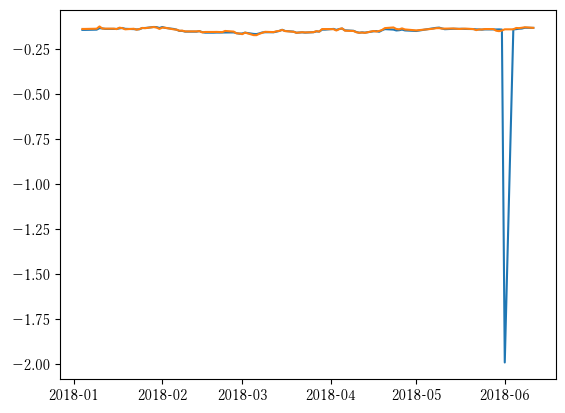

In [16]:
#Cell_13.
plt.plot(df_merged['time'],df_merged['JP01'])
plt.plot(df_merged['time'],df_merged['JP02'])
plt.show()

In [17]:
#Cell_14.
X = df_d[['time','JP01','JP02']]
Y = df_d[['close']]

In [18]:
#Cell_15.
X_c=sm.add_constant(X)
model=sm.OLS(Y,X_c)

In [19]:
#Cell_16.
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     91.47
Date:                Sat, 11 Oct 2025   Prob (F-statistic):           1.11e-28
Time:                        17:45:36   Log-Likelihood:                -661.36
No. Observations:                 105   AIC:                             1331.
Df Residuals:                     101   BIC:                             1341.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6587.4588    183.576     35.884      0.0

In [20]:
#Cell_17.
X_dumm=X.copy()
X_scaled_ar = scale(X_dumm)
y_scaled_ar = scale(Y)

model = sm.OLS(y_scaled_ar, X_scaled_ar)
results_scaled = model.fit()
print(results_scaled.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.731
Model:                            OLS   Adj. R-squared (uncentered):              0.723
Method:                 Least Squares   F-statistic:                              92.38
Date:                Sat, 11 Oct 2025   Prob (F-statistic):                    5.80e-29
Time:                        17:45:36   Log-Likelihood:                         -80.061
No. Observations:                 105   AIC:                                      166.1
Df Residuals:                     102   BIC:                                      174.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [21]:
#Cell_18.
X_test = pd.DataFrame([[1,2.0, 0.1, 0.001],
                       [1,2.0, 0.1, 0.1],
                        ],
                        columns=X_c.columns)  # example
print('X for prediction:')
display(X_test)

X for prediction:


,const,time,JP01,JP02
0,1,2.0,0.1,0.001
1,1,2.0,0.1,0.100


In [22]:
#Cell_19.
y_test = results.predict(X_test)
print('Predicted y:')
print(y_test)

Predicted y:
0    6585.798156
1    7668.100562
dtype: float64
